Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is
to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various
biomedical measurements.

To answer question 5), average the performance of the models over 10 separate runs. In each
run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

5.  [2v]  Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10
neurons each and no activation functions, and another MLP Regressor with 2 hidden
layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the
MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

/tmp/ipykernel_5768/3501598691.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mae_scores_lr, mae_scores_mlp_no_act, mae_scores_mlp_relu], labels=['Linear Regression', 'MLP No Activation', 'MLP ReLU'])


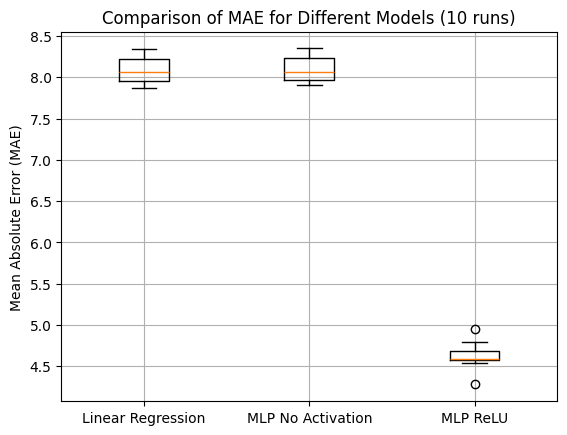

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('parkinsons.csv')

X = df.drop(columns=['target'])
y = df['target']

# Initialize containers for storing MAE scores
mae_scores_lr = []
mae_scores_mlp_no_act = []
mae_scores_mlp_relu = []

# Define models
lr_model = LinearRegression()
mlp_no_act_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0, max_iter=1000)
mlp_relu_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter= 1000)

# Perform 10 different 80-20 train-test splits and evaluate models
for i in range(1, 11):
    # Split data with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Linear Regression
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mae_scores_lr.append(mean_absolute_error(y_test, y_pred_lr))
    
    # MLP without activation
    mlp_no_act_model.fit(X_train, y_train)
    y_pred_mlp_no_act = mlp_no_act_model.predict(X_test)
    mae_scores_mlp_no_act.append(mean_absolute_error(y_test, y_pred_mlp_no_act))
    
    # MLP with ReLU activation
    mlp_relu_model.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu_model.predict(X_test)
    mae_scores_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu))

# Create boxplot of the test MAE of each model
plt.boxplot([mae_scores_lr, mae_scores_mlp_no_act, mae_scores_mlp_relu], labels=['Linear Regression', 'MLP No Activation', 'MLP ReLU'])
plt.title('Comparison of MAE for Different Models (10 runs)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()


7. [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the
hyperparameters of an MLP regressor with two hidden layers (size 10 each). The
parameters to search over are: (i) L2 penalty, with the values {0.0001, 0.001, 0.01}; (ii)
learning rate, with the values {0.001, 0.01, 0.1}; and (iii) batch size, with the values
{32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the
best combination, and discuss the trade-offs between the combinations.

MAE: 4.432634489293495
    param_batch_size  param_alpha  param_learning_rate_init  mean_test_score
0                 32       0.0001                     0.001        -4.587945
1                 32       0.0001                     0.010        -4.764895
2                 32       0.0001                     0.100        -5.583986
3                 64       0.0001                     0.001        -4.690111
4                 64       0.0001                     0.010        -4.698374
5                 64       0.0001                     0.100        -4.979027
6                128       0.0001                     0.001        -4.625272
7                128       0.0001                     0.010        -4.898394
8                128       0.0001                     0.100        -5.270012
9                 32       0.0010                     0.001        -4.566656
10                32       0.0010                     0.010        -4.782789
11                32       0.0010                    

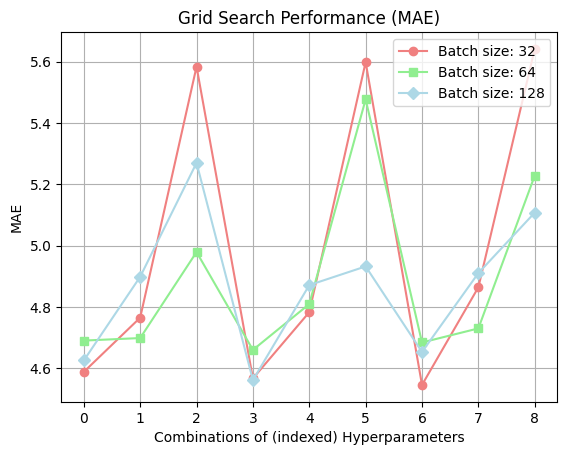

In [40]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('parkinsons.csv')  

if 'target' in df.columns:
    X = df.drop(columns=['target'])
    y = df['target']
else:
    print("A coluna 'target' não foi encontrada no dataset.")
    X, y = None, None  

# Split the data into training and testing sets (80-20) with random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model with two hidden layers of size 10
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=1000)

# Define the grid of parameters to test
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  
    'learning_rate_init': [0.001, 0.01, 0.1],  
    'batch_size': [32, 64, 128], 
}

# Define the GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Train the GridSearch on the training data
grid_search.fit(X_train_scaled, y_train)

# Evaluate the model with the best parameters on the test data
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {test_mae}")

# Display the best parameters and the corresponding MAE
best_params = grid_search.best_params_

# Results from Grid Search
results = pd.DataFrame(grid_search.cv_results_)

print(results[['param_batch_size','param_alpha', 'param_learning_rate_init', 'mean_test_score']])

# Invert the sign of mean_test_score since we used neg_mean_absolute_error
results['mean_test_score'] = -results['mean_test_score']

# Plotting the results of the Grid Search
colors = ['lightcoral', 'lightgreen', 'lightblue']
markers = ['o', 's', 'D']

for i, batch_size in enumerate([32, 64, 128]):
    subset = results[results['param_batch_size'] == batch_size]
    plt.plot(np.arange(len(subset)), subset['mean_test_score'], marker=markers[i], color=colors[i], label=f'Batch size: {batch_size}')

plt.title("Grid Search Performance (MAE)") 
plt.xlabel("Combinations of (indexed) Hyperparameters") 
plt.ylabel("MAE")  
plt.legend() 
plt.grid(True)  
plt.show() 


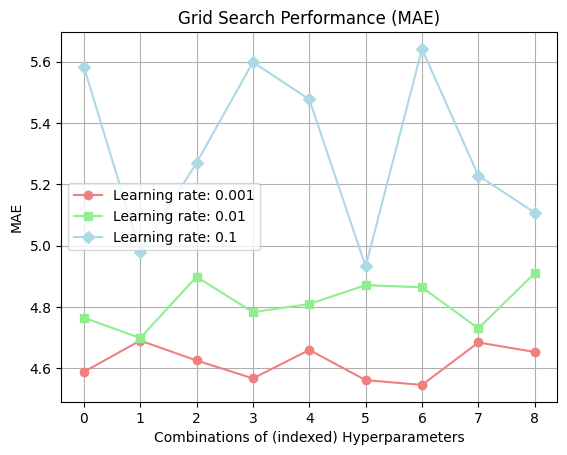

In [41]:
# Plotting the results of the Grid Search
colors = ['lightcoral', 'lightgreen', 'lightblue']
markers = ['o', 's', 'D']

# Loop through learning rates
for i, learning_rate_init in enumerate([0.001, 0.01, 0.1]):
    subset = results[results['param_learning_rate_init'] == learning_rate_init]
    plt.plot(np.arange(len(subset)), subset['mean_test_score'], marker=markers[i], color=colors[i], label=f'Learning rate: {learning_rate_init}')

# Set titles and labels
plt.title("Grid Search Performance (MAE)")
plt.xlabel("Combinations of (indexed) Hyperparameters")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

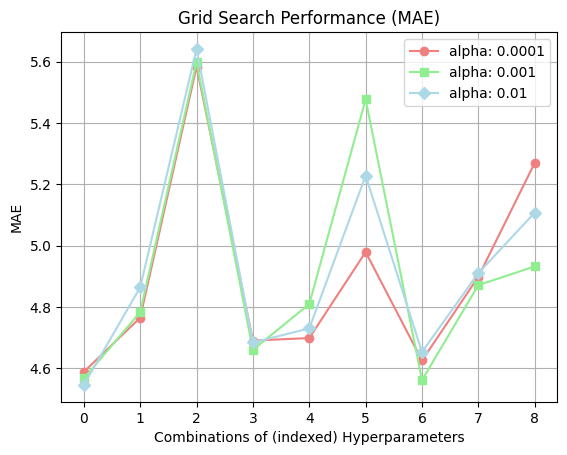

In [42]:
# Plotting the results of the Grid Search
colors = ['lightcoral', 'lightgreen', 'lightblue']
markers = ['o', 's', 'D']

# Loop through L2 penalties
for i, L2_penalty in enumerate([0.0001, 0.001, 0.01]):
    subset = results[results['param_alpha'] == L2_penalty]
    plt.plot(np.arange(len(subset)), subset['mean_test_score'], marker=markers[i], color=colors[i], label=f'alpha: {L2_penalty}')

# Set titles and labels
plt.title("Grid Search Performance (MAE)")
plt.xlabel("Combinations of (indexed) Hyperparameters")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()